# Analysis on the Census Income Dataset
<br/ ><br/ >
*Task is to predict whether income exceeds 50K/yr based on census data. Also known as "Census Income" dataset. *<br/ >

** Note that in the train and test data,salary > 50K is represented by 1 and <= 50K is represented by 0.**<br/ >

**Data set description**: Below is a brief overview of type and values for various features in the data set.
<br/ ><br/ >
**age**: continuous.<br/ >
**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br/ >
**fnlwgt**: continuous.<br/ >
**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br/ >
**education-num**: continuous.<br/ >
**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br/ >
**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br/ >
**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br/ >
**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br/ >
**sex**: Female, Male.<br/ >
**capital-gain**: continuous.<br/ >
**capital-loss**: continuous.<br/ >
**hours-per-week**: continuous.<br/ >
**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
<br/ ><br/ ><br/ >

### Importing libraries and reading the census data

In [107]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Reading the census data into dataframes
train_df = pd.read_csv("data/train.csv")
#getting to know about the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38973 entries, 0 to 38972
Data columns (total 16 columns):
id                38973 non-null int64
age               38973 non-null int64
workclass         38973 non-null object
fnlwgt            38973 non-null int64
education         38973 non-null object
education-num     38973 non-null int64
marital-status    38973 non-null object
occupation        38973 non-null object
relationship      38973 non-null object
race              38973 non-null object
sex               38973 non-null object
capital-gain      38973 non-null int64
capital-loss      38973 non-null int64
hours-per-week    38973 non-null int64
native-country    38973 non-null object
salary            38973 non-null int64
dtypes: int64(8), object(8)
memory usage: 4.8+ MB



### Visualization on Age column

/home/hareesh/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


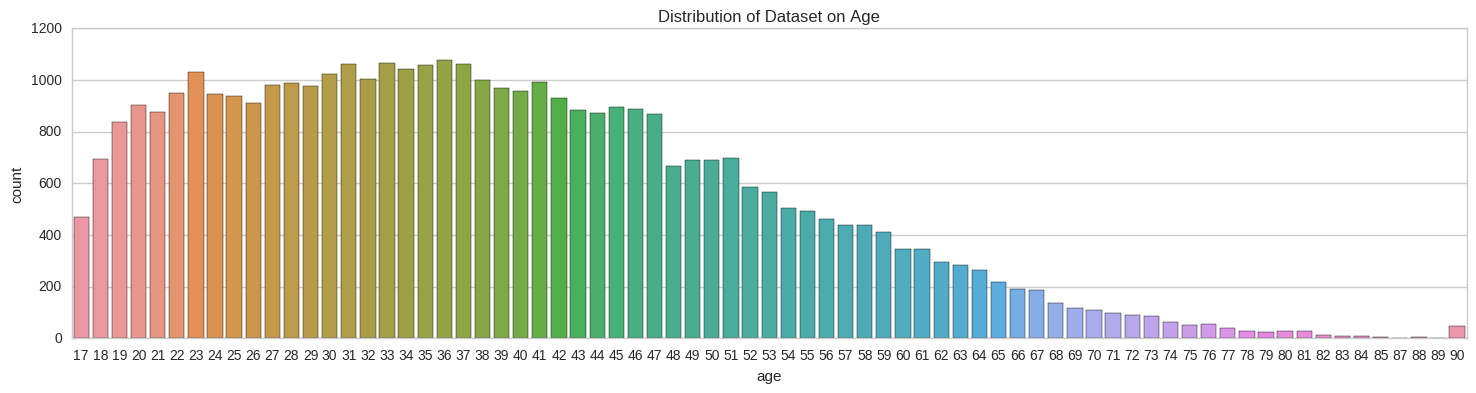

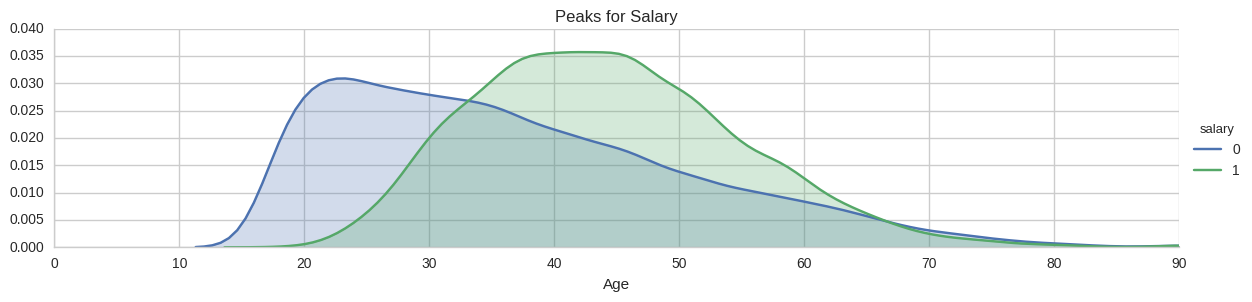

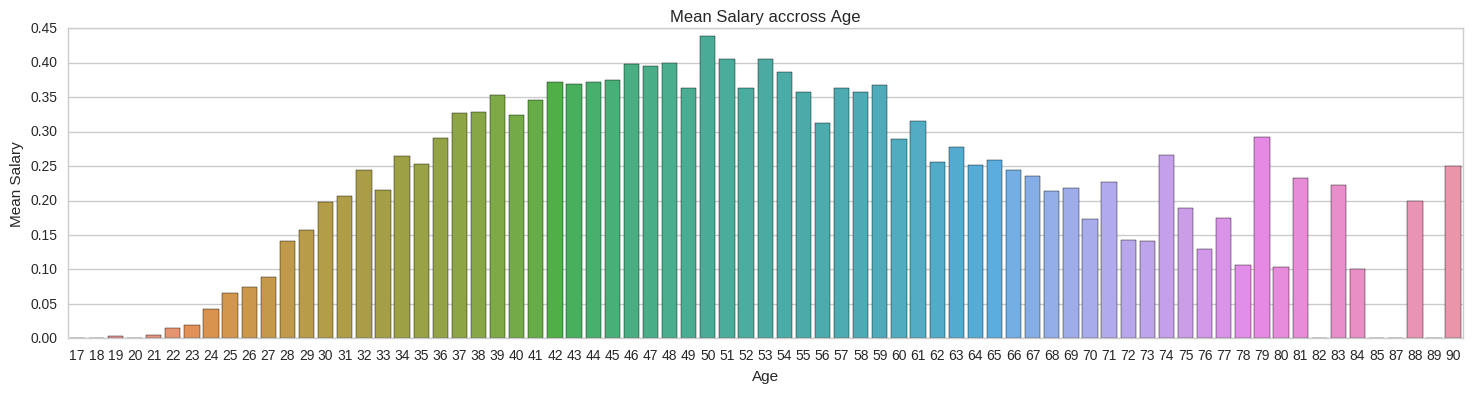

In [168]:
plt.figure(figsize=(18,4))
sns.countplot(x='age', data=train_df)
sns.plt.title('Distribution of Dataset on Age')


# peaks for salary true or false  by their age
facet = sns.FacetGrid(train_df, hue="salary",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlabel='Age', ylabel='',xlim=(0, train_df['age'].max()))
facet.add_legend()
sns.plt.title('Peaks for Salary')

# average salary passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["age", "salary"]].groupby(['age'],as_index=False).mean()
ax=sns.barplot(x='age', y='salary', data=average_age)
ax.set(xlabel='Age', ylabel='Mean Salary')
sns.plt.title('Mean Salary accross Age')

#### Observation

**Dataset**: The data is collected between the age group 17-90, and most of the data is from age 19-47. <br />
**Peak**: Most of the people of the age 22$\pm$2 get salary < 50k and most of the people of the age 42$\pm$5 get salary >=50k <br />
The last figure shows the average salary of people <br/> <br/> 


### Visualization on Workclass column

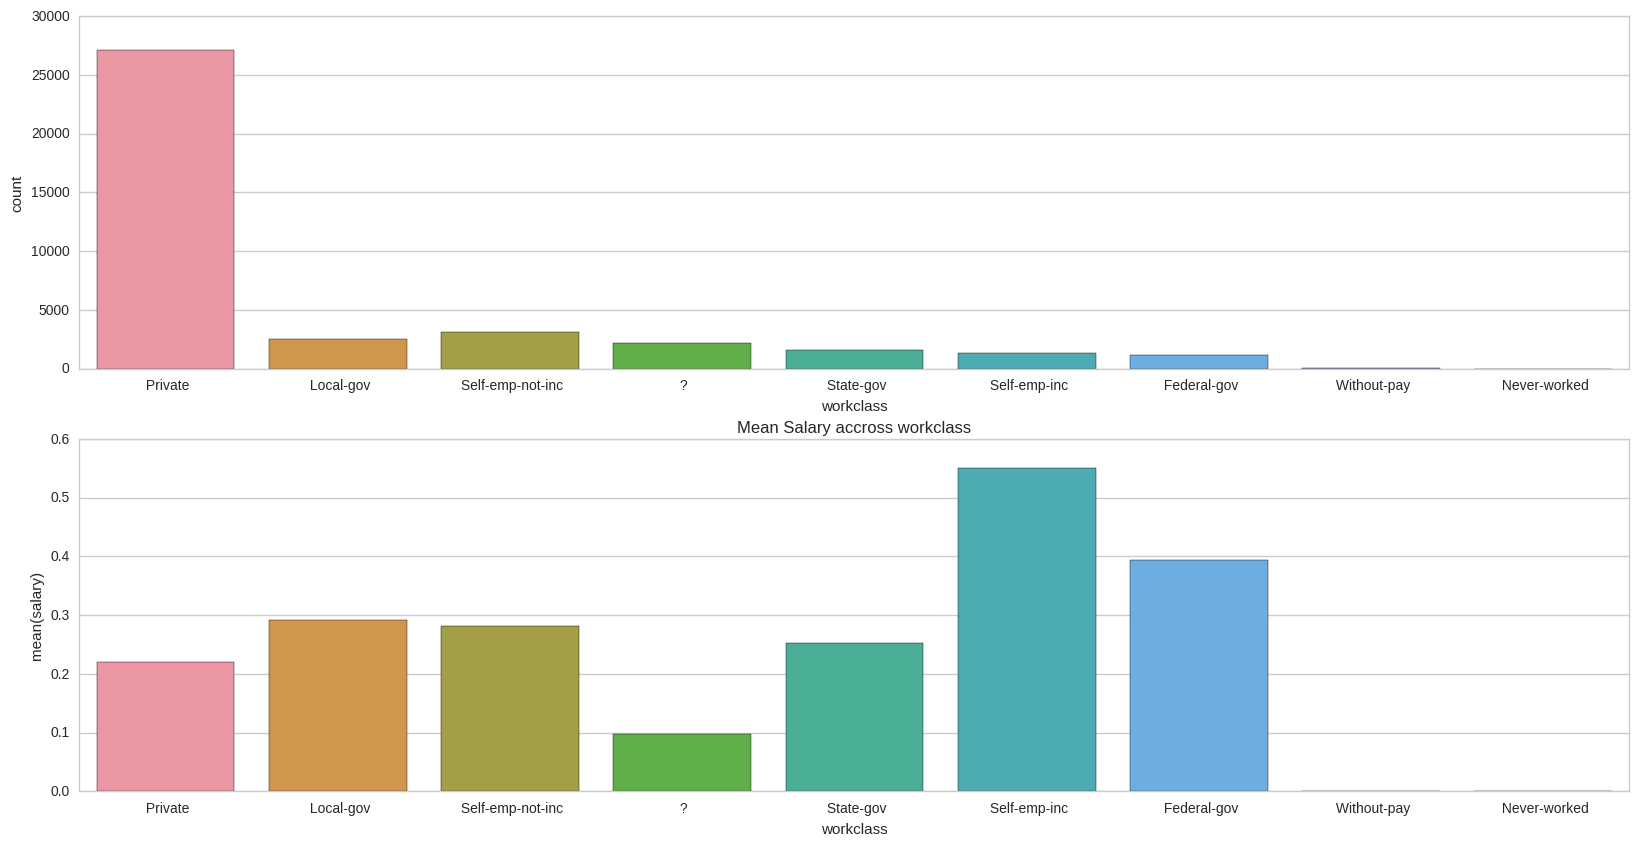

In [177]:
# Plotting the distribution of dataset on workclass
fig, (axis1,axis2) = plt.subplots(2,figsize=(20,10))
sns.countplot(x='workclass', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on workclass')

# average salary for each Person based on workclass
person_perc = train_df[["workclass", "salary"]].groupby(['workclass'],as_index=False).mean()
sns.barplot(x='workclass', y='salary', data=person_perc, ax=axis2,order=list(train_df.workclass.unique()))
sns.plt.title('Mean Salary accross workclass')

[' Private',
 ' Local-gov',
 ' Self-emp-not-inc',
 ' ?',
 ' State-gov',
 ' Self-emp-inc',
 ' Federal-gov',
 ' Without-pay',
 ' Never-worked']

### Visualization on fnlwgt column

/home/hareesh/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


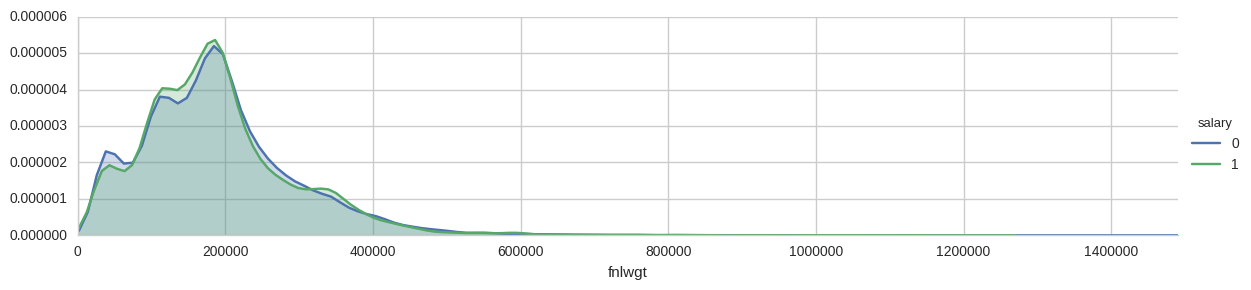

In [75]:
# peaks for fnlwgt true or false by their age
facet = sns.FacetGrid(train_df, hue="salary",aspect=4)
facet.map(sns.kdeplot,'fnlwgt',shade= True)
facet.set(xlim=(0, train_df['fnlwgt'].max()))
facet.add_legend()

#### Observation

*Peak for the salary < 50 is almost same as the peak >= 50, can be removed as the correlation between them is almost same* 

### Visualization on education column

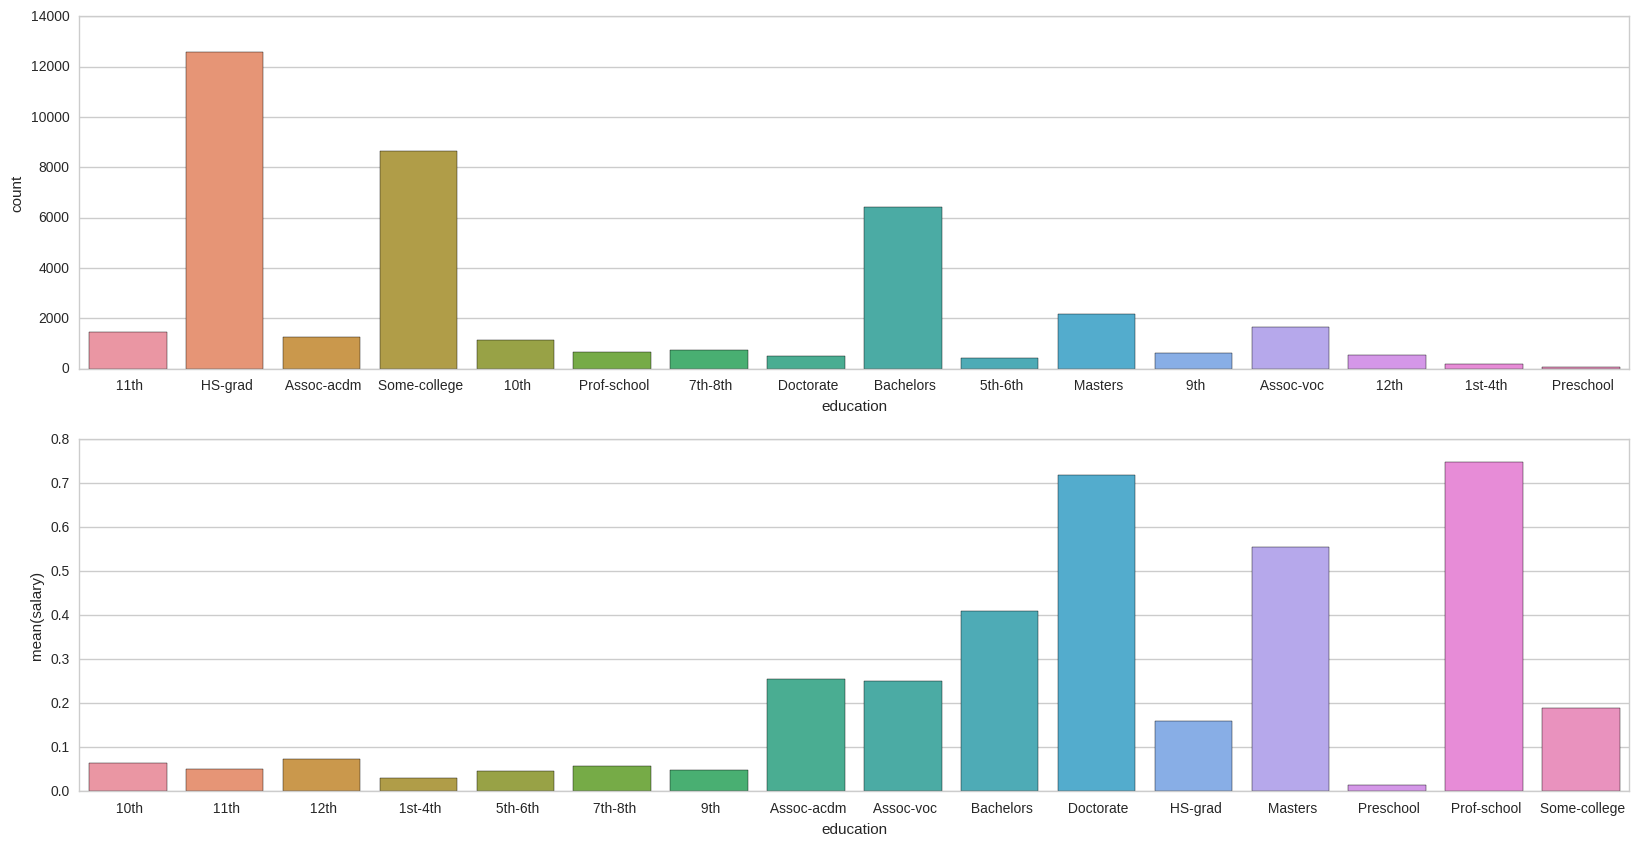

In [76]:
# Plotting the distribution of dataset on education
fig, (axis1,axis2) = plt.subplots(2,figsize=(20,10))
sns.countplot(x='education', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on education')

# average salary for each Person based on education
person_perc = train_df[["education", "salary"]].groupby(['education'],as_index=False).mean()
sns.barplot(x='education', y='salary', data=person_perc, ax=axis2,,order=list(train_df.education.unique()))
sns.plt.title('Mean Salary accross education')

#### Observation
**Dataset**: Most of the dataset is of High School grads, Bachelors and College people
*Masters, Doctorate and Professors in School have high probablity of getting salary > 50k*


### Visualization on education-num column

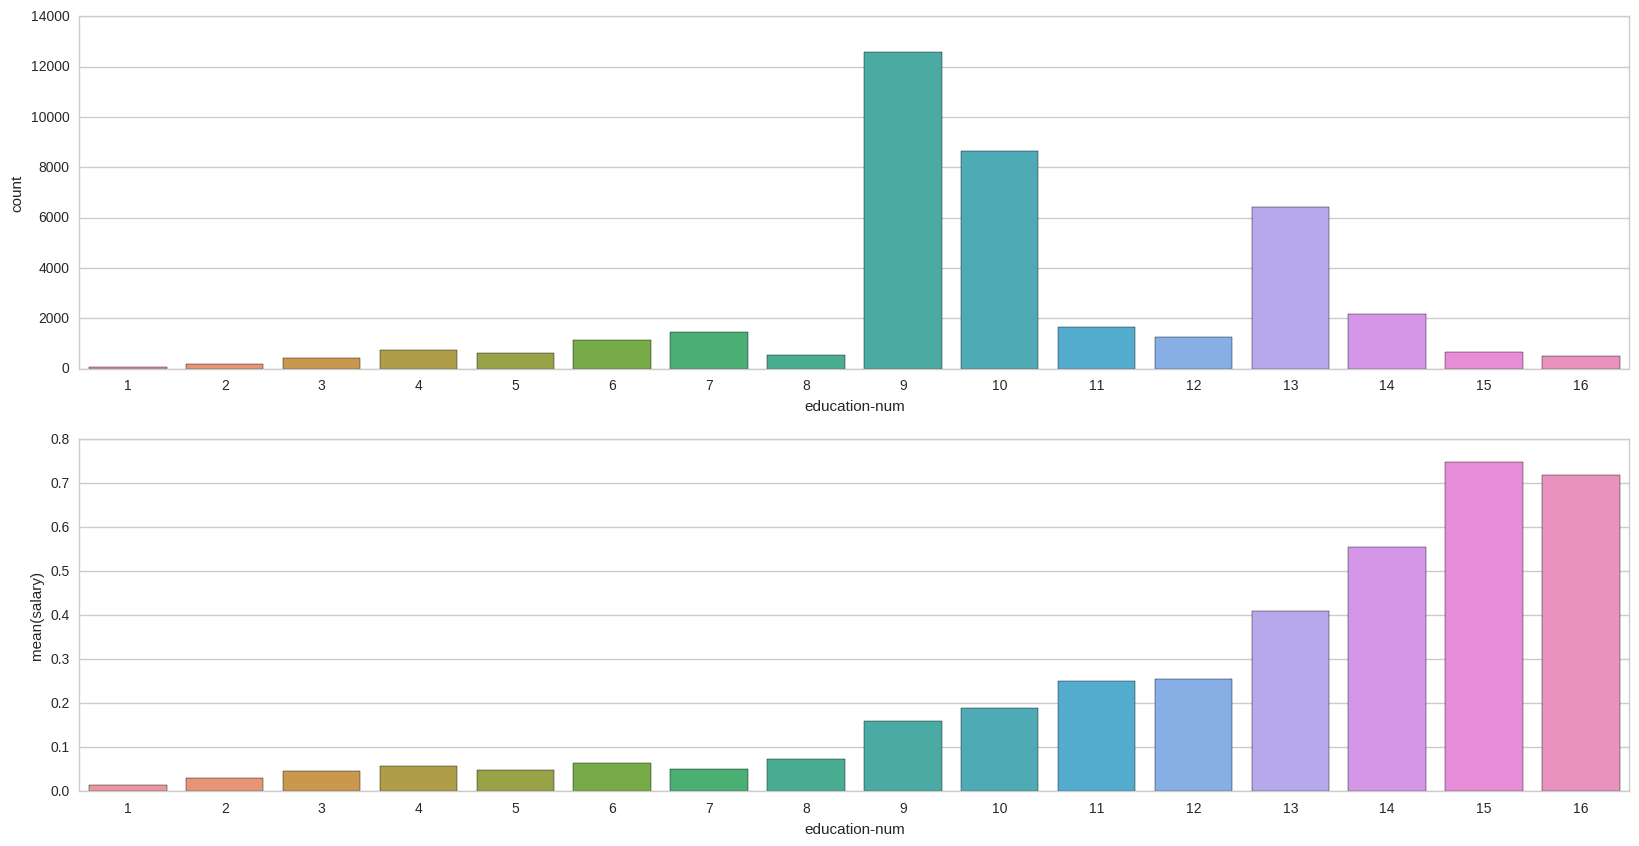

In [111]:
# Plotting the distribution of dataset on education-num
fig, (axis1,axis2) = plt.subplots(2,figsize=(20,10))
sns.countplot(x='education-num', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on education-num')

# average salary for each Person based on education-num
person_perc = train_df[["education-num", "salary"]].groupby(['education-num'],as_index=False).mean()
sns.barplot(x='education-num', y='salary', data=person_perc, ax=axis2,,order=list(train_df.education-num.unique()))
sns.plt.title('Mean Salary accross education-num')

### Visualization on marital-status column

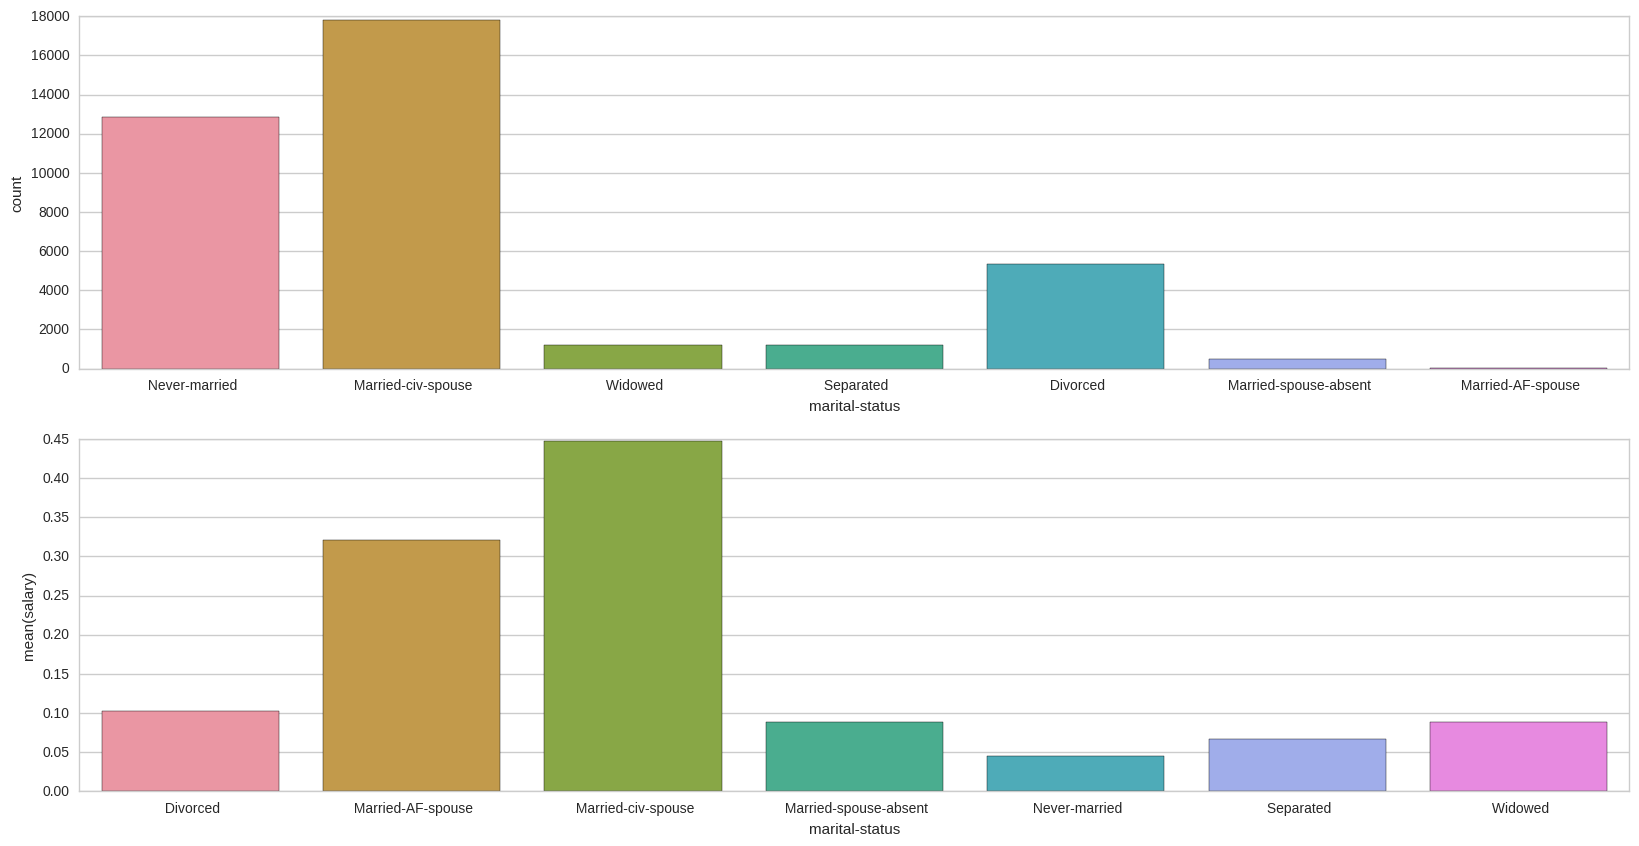

In [112]:
# Plotting the distribution of dataset on  marital-status
fig, (axis1,axis2) = plt.subplots(2,figsize=(20,10))
sns.countplot(x='marital-status', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on marital-status')

# average salary for each Person based on marital-status
person_perc = train_df[["marital-status", "salary"]].groupby(['marital-status'],as_index=False).mean()
sns.barplot(x='marital-status', y='salary', data=person_perc, ax=axis2,,order=list(train_df.marital-status.unique()))
sns.plt.title('Mean Salary accross marital-status')

### Visualization on occupation column

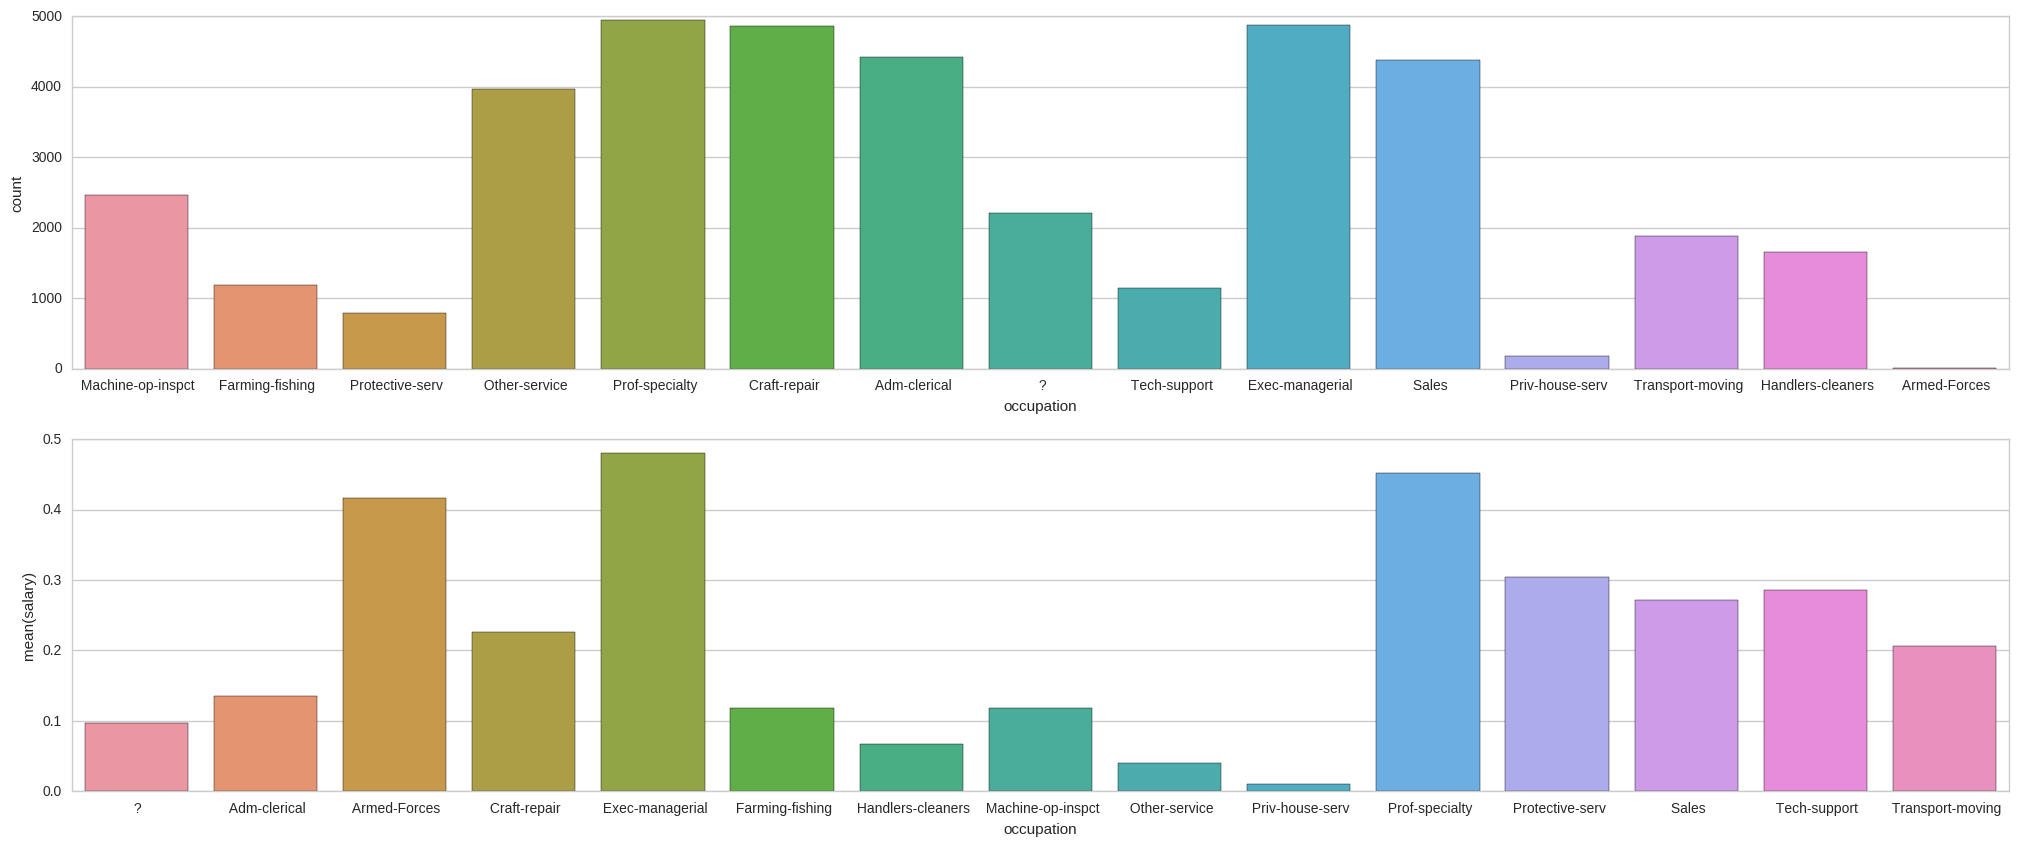

In [114]:
# Plotting the distribution of dataset on occupation
fig, (axis1,axis2) = plt.subplots(2,figsize=(25,10))
sns.countplot(x='occupation', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on occupation')

# average salary for each Person based on occupation
person_perc = train_df[["occupation", "salary"]].groupby(['occupation'],as_index=False).mean()
sns.barplot(x='occupation', y='salary', data=person_perc, ax=axis2,,order=list(train_df.occupation.unique()))
sns.plt.title('Mean Salary accross occupation')

### Visualization on relationship column

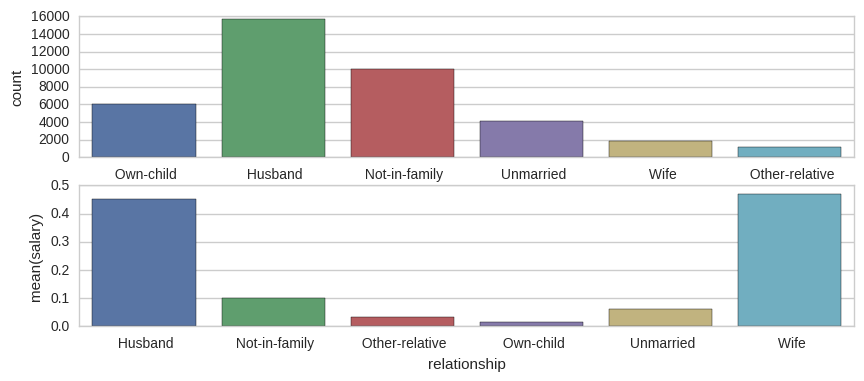

In [123]:
# Plotting the distribution of dataset on  relationship
fig, (axis1,axis2) = plt.subplots(2,figsize=(10,4))
sns.countplot(x='relationship', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on relationship')

# average salary for each Person based on relationship
person_perc = train_df[["relationship", "salary"]].groupby(['relationship'],as_index=False).mean()
sns.barplot(x='relationship', y='salary', data=person_perc, ax=axis2,,order=list(train_df.relationship.unique()))
sns.plt.title('Mean Salary accross relationship')

### Visualization on race column

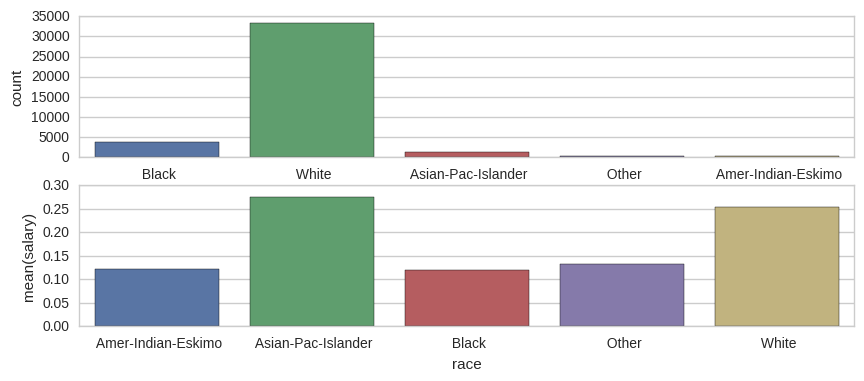

In [122]:
# Plotting the distribution of dataset on race
fig, (axis1,axis2) = plt.subplots(2,figsize=(10,4))
sns.countplot(x='race', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on race')

# average salary for each Person based on race
person_perc = train_df[["race", "salary"]].groupby(['race'],as_index=False).mean()
sns.barplot(x='race', y='salary', data=person_perc, ax=axis2,order=list(train_df.race.unique()))
sns.plt.title('Mean Salary accross race')

### Visualization on sex column

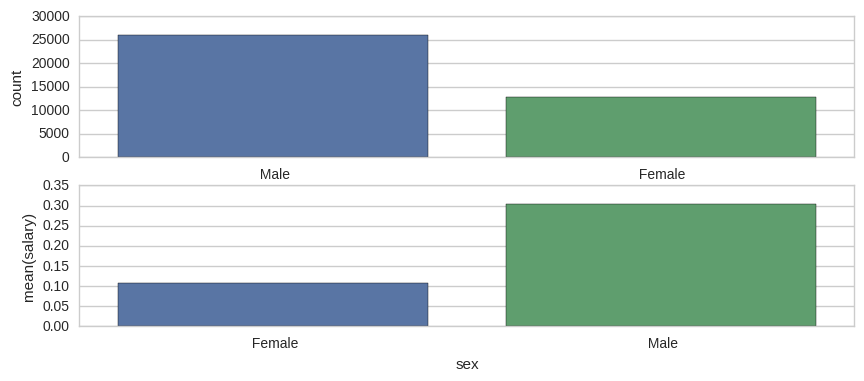

In [126]:
# Plotting the distribution of dataset on sex
fig, (axis1,axis2) = plt.subplots(2,figsize=(10,4))
sns.countplot(x='sex', data=train_df, ax=axis1)
sns.plt.title('Distribution of Dataset on sex')

# average salary for each Person based on sex
person_perc = train_df[["sex", "salary"]].groupby(['sex'],as_index=False).mean()
sns.barplot(x='sex', y='salary', data=person_perc, ax=axis2,,order=list(train_df.sex.unique()))
sns.plt.title('Mean Salary accross sex')

### Visualization on capital-gain column

/home/hareesh/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


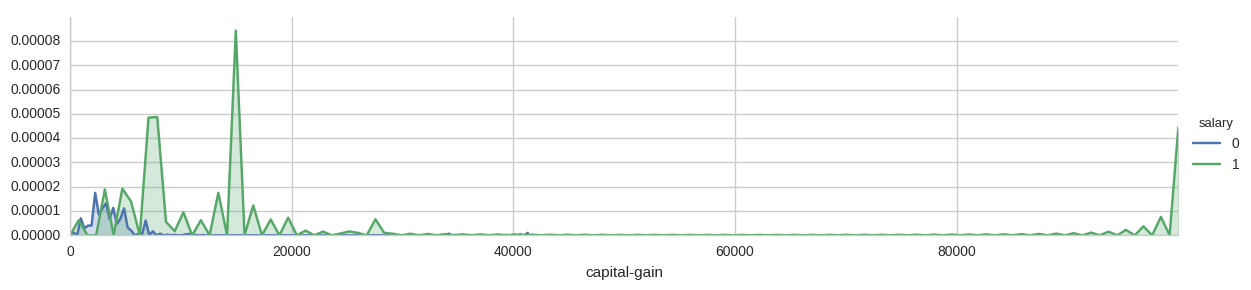

In [127]:
# peaks for salary true or false  by their capital-gain
facet = sns.FacetGrid(train_df, hue="salary",aspect=4)
facet.map(sns.kdeplot,'capital-gain',shade= True)
facet.set(xlim=(0, train_df['capital-gain'].max()))
facet.add_legend()

### Visualization on capital-loss column

/home/hareesh/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


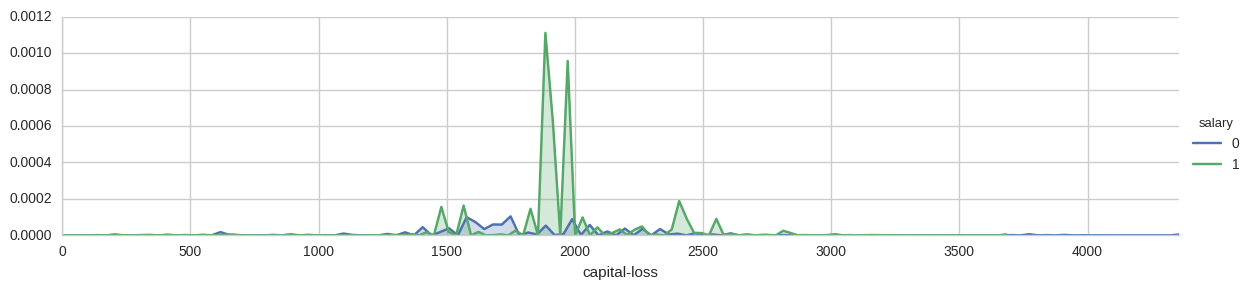

In [128]:
# peaks for salary true or false  by their capital-loss
facet = sns.FacetGrid(train_df, hue="salary",aspect=4)
facet.map(sns.kdeplot,'capital-loss',shade= True)
facet.set(xlim=(0, train_df['capital-loss'].max()))
facet.add_legend()

### Visualization on hours-per-week column

/home/hareesh/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94]),
 <a list of 95 Text xticklabel objects>)

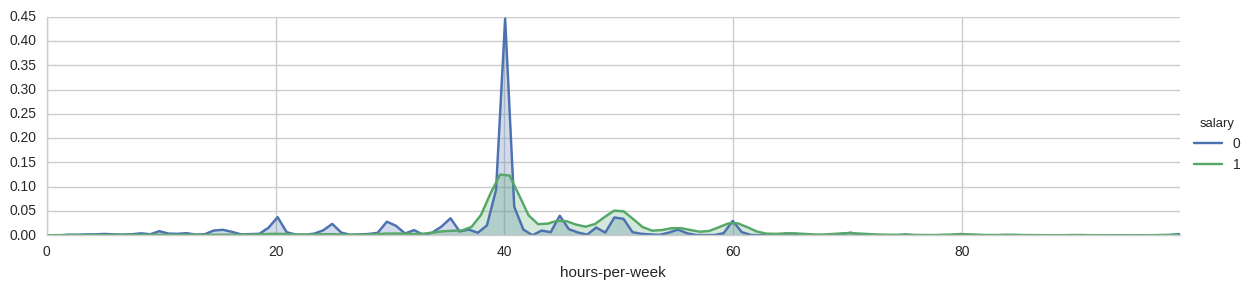

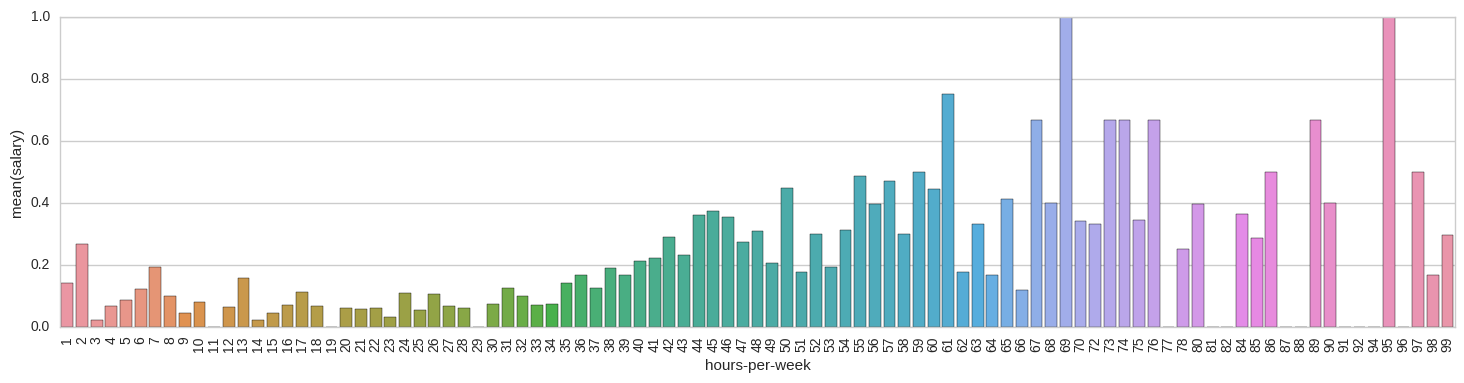

In [156]:
# peaks for salary true or false  by their hours-per-week
facet = sns.FacetGrid(train_df, hue="salary",aspect=4)
facet.map(sns.kdeplot,'hours-per-week',shade= True)
facet.set(xlim=(0, train_df['hours-per-week'].max()))
facet.add_legend()

# average salary passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_df[["hours-per-week", "salary"]].groupby(['hours-per-week'],as_index=False).mean()
sns.barplot(x='hours-per-week', y='salary', data=average_age)
plt.xticks(rotation=90)
sns.plt.title('Mean Salary accross Age')

### Visualization based on native-country column

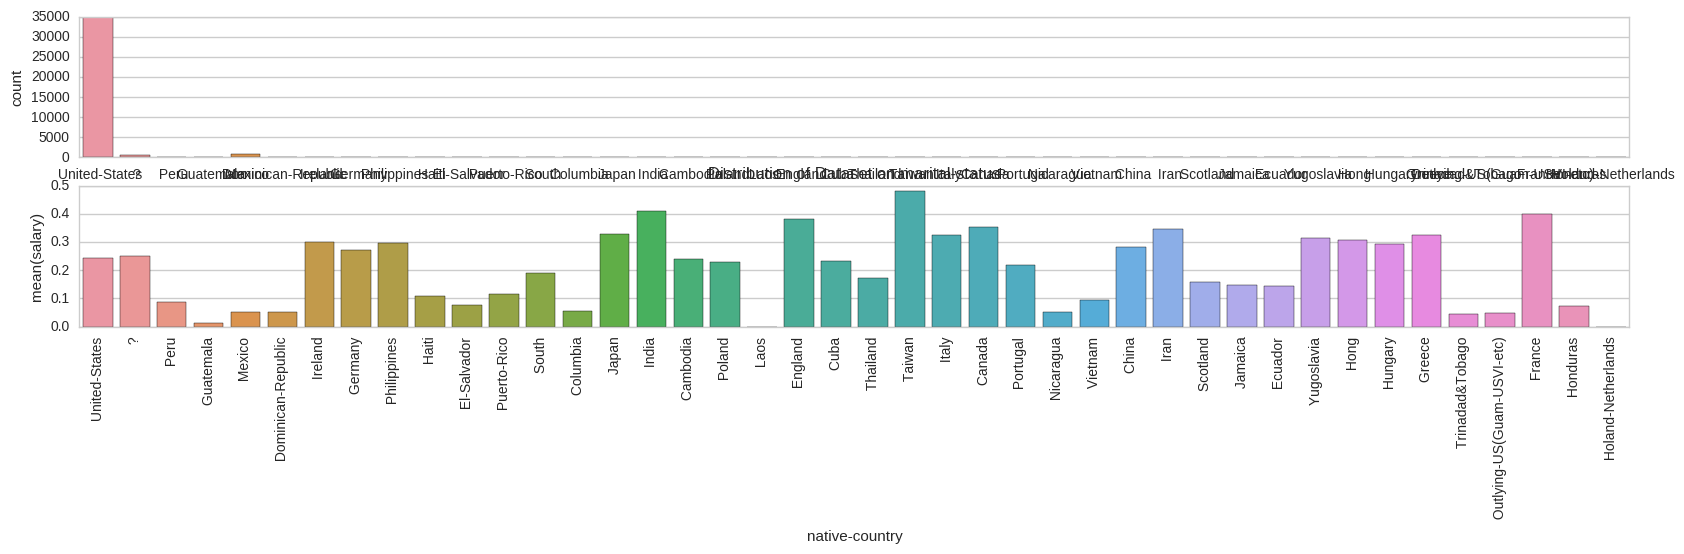

In [181]:
# Data distribution based on native-country
fig, (axis1,axis2) = plt.subplots(2,figsize=(20,4))
plt.xticks(rotation=90)

sns.countplot(x='native-country', data=train_df, ax=axis1)

person_perc = train_df[["native-country", "salary"]].groupby(['native-country'],as_index=False).mean()
g=sns.barplot(x='native-country', y='salary', data=person_perc, ax=axis2,order=list(train_df["native-country"].unique()))

### Pairwise plot based on the salary

In [ ]:
g = sns.pairplot(train_df[list(train_df)], hue='salary', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

/home/hareesh/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


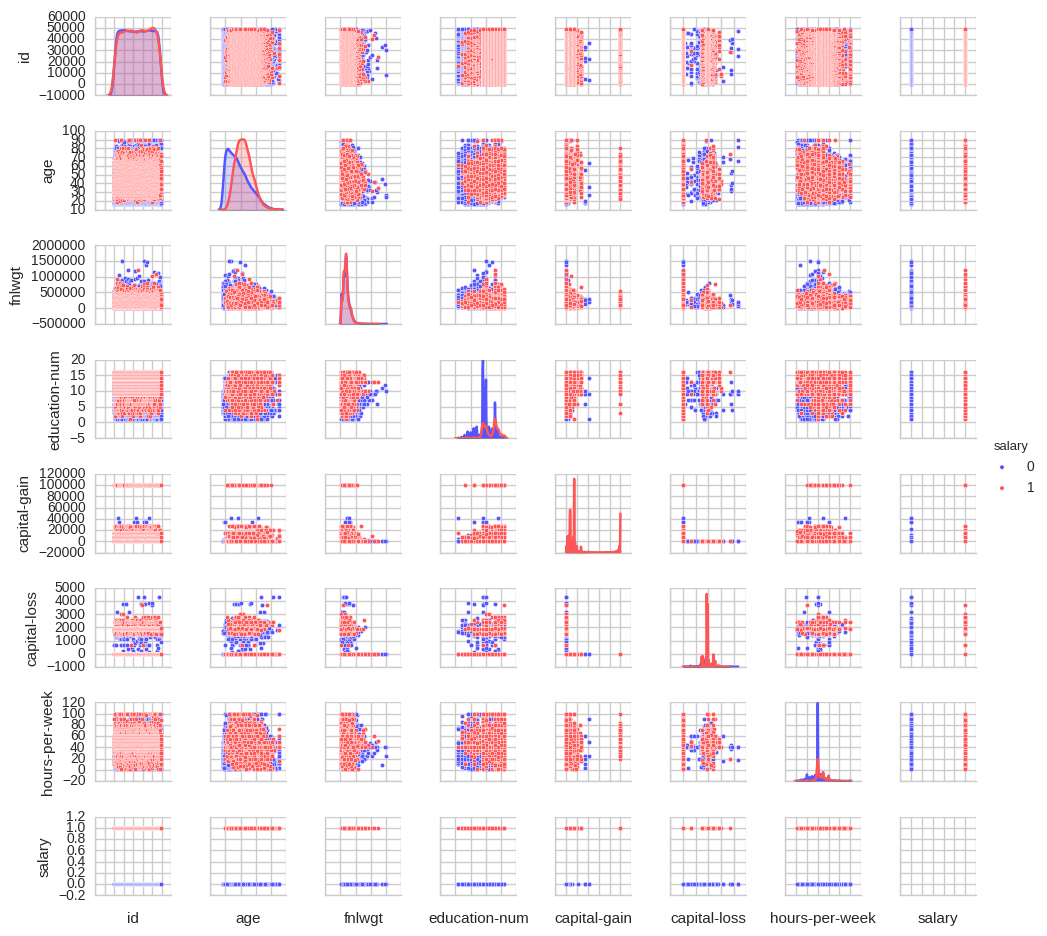